In [1]:
import pandas

size_log = pandas.read_pickle("4-generated-mdps/success.pkl.gz")
aborts = pandas.read_pickle("4-generated-mdps/fail.pkl.gz")

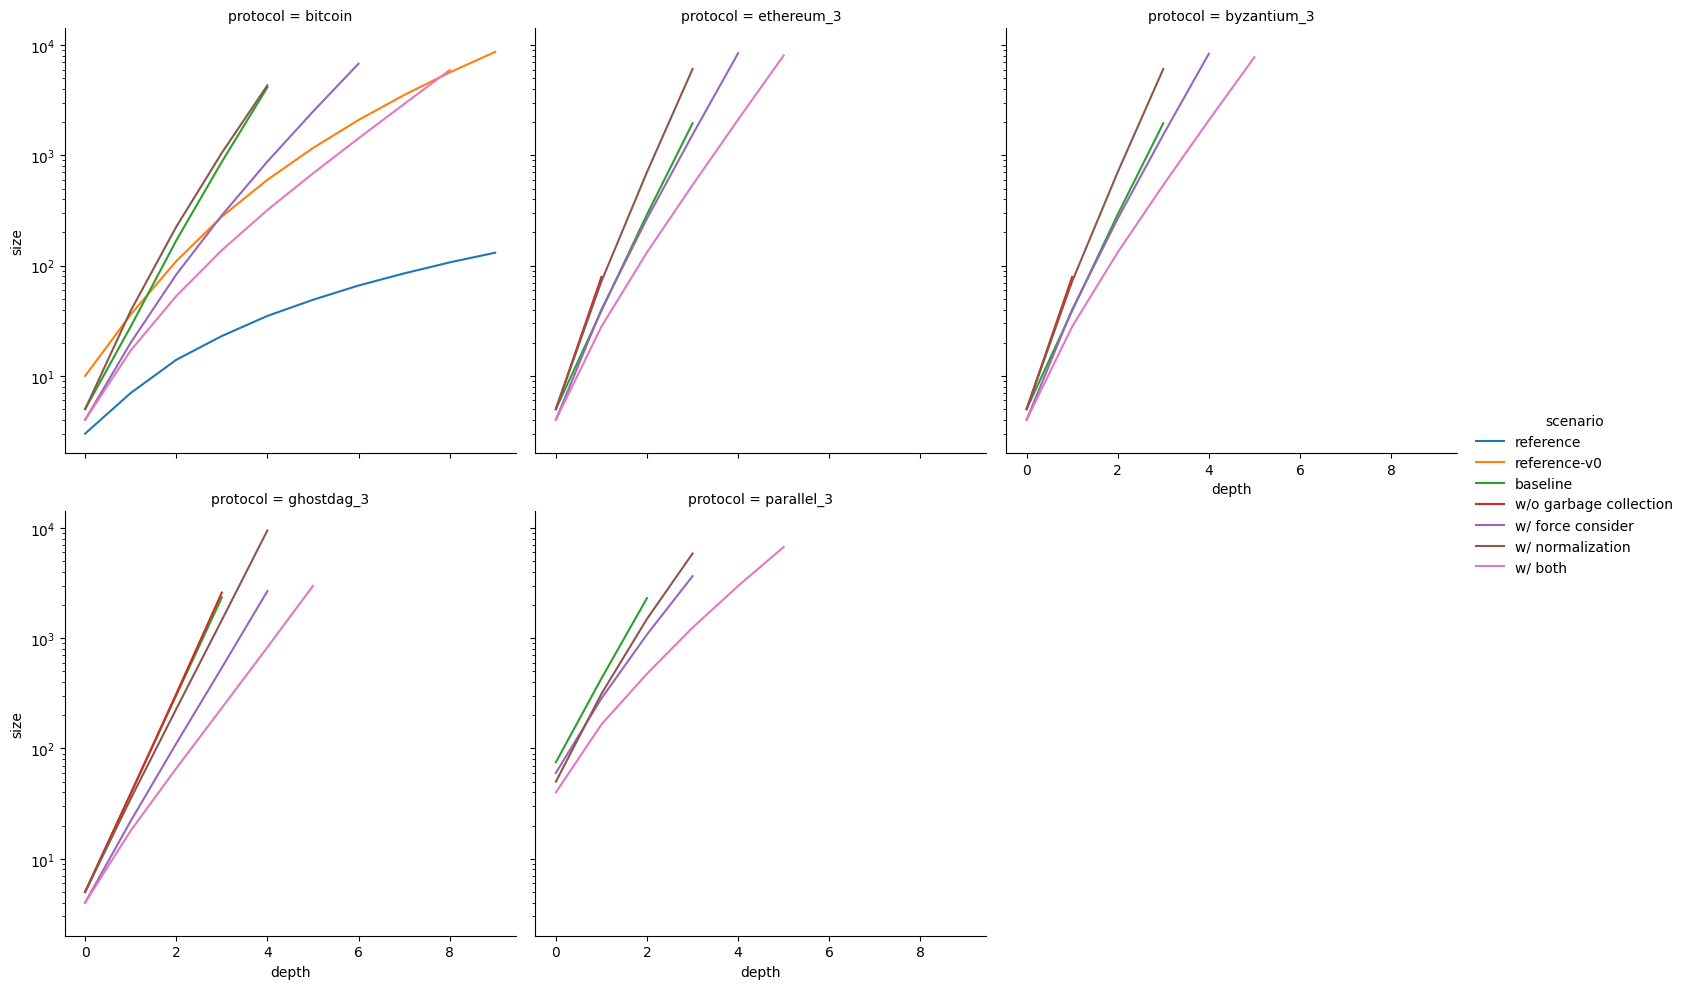

In [2]:
import seaborn

seaborn.relplot(
    data=size_log.query("depth < 10"),
    kind="line",
    x="depth",
    y="size",
    hue="scenario",
    col="protocol",
    col_wrap=3,
).set(yscale="log")

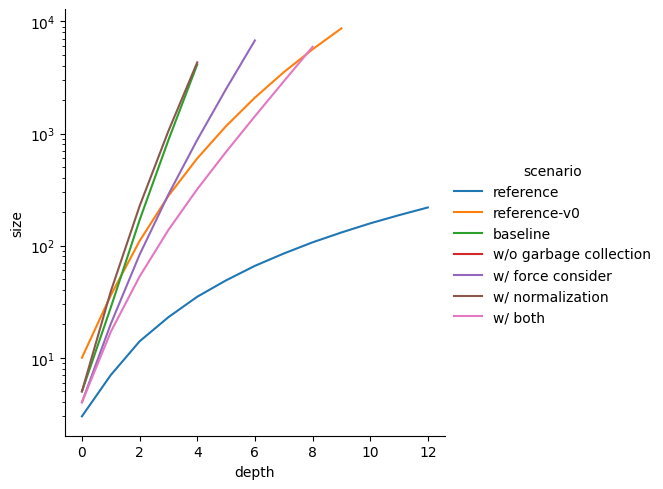

In [3]:
seaborn.relplot(
    data=size_log.query("protocol == 'bitcoin' and depth < 13"),
    kind="line",
    x="depth",
    y="size",
    hue="scenario",
).set(yscale="log")

In [4]:
scenario_labels = {
    "reference": "reference-fc16",
    "reference-v0": "drop",
    "baseline": "baseline",
    "w/o garbage collection": "baseline-gc",
    "w/ force consider": "baseline+fc",
    "w/ normalization": "baseline+n",
    "w/ both": "baseline+fc+n",
}

depth_cutoff = max(size_log.query("scenario != 'reference'").depth) + 1

btc_size = (
    size_log.assign(scenario=[scenario_labels[x] for x in size_log.scenario])
    .query("scenario != 'drop'")
    .query("protocol == 'bitcoin'")
    .query(f"depth <= {depth_cutoff}")
    .pivot(index="depth", columns="scenario", values="size")
)

btc_size.to_csv("5-state-space-exploration-viz-for-paper-btc-size.csv")
btc_size

scenario,baseline,baseline+fc,baseline+fc+n,baseline+n,baseline-gc,reference-fc16
depth,,,,,,
0,5.0,4.0,4.0,5.0,5.0,3.0
1,28.0,20.0,17.0,39.0,NaN,7.0
2,169.0,83.0,53.0,225.0,NaN,14.0
3,874.0,286.0,138.0,1053.0,NaN,23.0
4,4134.0,878.0,319.0,4314.0,NaN,35.0
5,NaN,2493.0,686.0,NaN,NaN,49.0
6,NaN,6772.0,1426.0,NaN,NaN,66.0
7,NaN,NaN,2917.0,NaN,NaN,85.0
8,NaN,NaN,5932.0,NaN,NaN,107.0


In [5]:
# how should we report on the other protocols?
# column a: show max depth explored in table for fully optimized exploration only; calculate blow up factor and add as columns


def tabulate_deepest(d):
    return d.iloc[d.groupby(["scenario", "protocol"]).depth.idxmax()]


deepest = (
    tabulate_deepest(size_log)
    .reset_index(drop=True)
    .query("scenario != 'w/o garbage collection'")
    .query("scenario != 'reference-v0'")
)

deepest.to_pickle("4-generated-mdps/deepest.pkl.gz")

deepest

,scenario,model,force_consider_own,merge_isomorphic,truncate_common_chain,collect_garbage,protocol,depth,size,time_spent,rss,mdp
0,baseline,generic_1,False,False,True,True,bitcoin,4,4134,1.863681,0.145348,ba3e1390
1,baseline,generic_1,False,False,True,True,byzantium_3,3,1953,1.615463,0.149483,14507cab
2,baseline,generic_1,False,False,True,True,ethereum_3,3,1953,1.507553,0.146019,7dd96460
3,baseline,generic_1,False,False,True,True,ghostdag_3,3,2339,2.290192,0.151218,6ddf2c7c
4,baseline,generic_1,False,False,True,True,parallel_3,2,2309,1.472804,0.164925,67685f04
5,reference,fc16sapirshtein,True,True,True,True,bitcoin,88,9947,23.148762,0.153172,7f58bc2a
7,w/ both,generic_1,True,True,True,True,bitcoin,8,5932,7.132206,0.179195,5bc7b157
8,w/ both,generic_1,True,True,True,True,byzantium_3,5,7764,11.828173,0.202477,21679dd0
9,w/ both,generic_1,True,True,True,True,ethereum_3,5,8052,10.778431,0.205708,4b2d5e99
10,w/ both,generic_1,True,True,True,True,ghostdag_3,5,2977,5.676991,0.186939,5f32cb0d


In [6]:
# how should we report on the other protocols?
# column b: fix depth in table

fixed_depth = min(deepest.depth)
fixed = (
    size_log.query("scenario != 'w/o garbage collection'")
    .query("scenario != 'reference-v0'")
    .query(f"depth == {fixed_depth}")
    .reset_index(drop=True)
)
fixed.to_pickle("4-generated-mdps/fixed.pkl.gz")
fixed

,scenario,model,force_consider_own,merge_isomorphic,truncate_common_chain,collect_garbage,protocol,depth,size,time_spent,rss,mdp
0,reference,fc16sapirshtein,True,True,True,True,bitcoin,2,14,0.087292,0.108395,27952cf1
1,baseline,generic_1,False,False,True,True,bitcoin,2,169,0.114033,0.135948,69dce8c8
2,baseline,generic_1,False,False,True,True,ethereum_3,2,291,0.556252,0.146263,4d20e46e
3,baseline,generic_1,False,False,True,True,byzantium_3,2,291,0.584332,0.149483,9add7283
4,baseline,generic_1,False,False,True,True,ghostdag_3,2,303,0.608089,0.151218,1464cb49
5,baseline,generic_1,False,False,True,True,parallel_3,2,2309,1.472804,0.164925,67685f04
6,w/ force consider,generic_1,True,False,True,True,bitcoin,2,83,0.466182,0.161274,4a2aeffd
7,w/ force consider,generic_1,True,False,True,True,ethereum_3,2,267,0.662471,0.166985,18b81fcb
8,w/ force consider,generic_1,True,False,True,True,byzantium_3,2,267,0.696327,0.169182,1d8e5bac
9,w/ force consider,generic_1,True,False,True,True,ghostdag_3,2,111,0.597705,0.171299,64d46896


In [7]:
combined = pandas.DataFrame(
    dict(
        max_depth=deepest.set_index(["scenario", "protocol"]).depth,
        size_at_fixed_depth=fixed.set_index(["scenario", "protocol"])["size"],
    )
).reset_index()
combined

,scenario,protocol,max_depth,size_at_fixed_depth
0,baseline,bitcoin,4,169
1,baseline,byzantium_3,3,291
2,baseline,ethereum_3,3,291
3,baseline,ghostdag_3,3,303
4,baseline,parallel_3,2,2309
5,reference,bitcoin,88,14
6,w/ both,bitcoin,8,53
7,w/ both,byzantium_3,5,132
8,w/ both,ethereum_3,5,132
9,w/ both,ghostdag_3,5,66


In [8]:
fixed_depth

2

In [9]:
combined.set_index(["scenario", "protocol"]).unstack(level=0).stack(
    level=0, future_stack=True
).unstack(level=1)

scenario     baseline                     reference                      \
            max_depth size_at_fixed_depth max_depth size_at_fixed_depth   
protocol                                                                  
bitcoin           4.0               169.0      88.0                14.0   
byzantium_3       3.0               291.0       NaN                 NaN   
ethereum_3        3.0               291.0       NaN                 NaN   
ghostdag_3        3.0               303.0       NaN                 NaN   
parallel_3        2.0              2309.0       NaN                 NaN   

scenario      w/ both                     w/ force consider  \
            max_depth size_at_fixed_depth         max_depth   
protocol                                                      
bitcoin           8.0                53.0               6.0   
byzantium_3       5.0               132.0               4.0   
ethereum_3        5.0               132.0               4.0   
ghostdag_3        5.0                66.0               4.0   
parallel_3        5.0               476.0               3.0   

scenario                        w/ normalization                      
            size_at_fixed_depth        max_depth size_at_fixed_depth  
protocol                                                              
bitcoin                    83.0              4.0               225.0  
byzantium_3               267.0              3.0               705.0  
ethereum_3                267.0              3.0               705.0  
ghostdag_3                111.0              4.0               228.0  
parallel_3               1080.0              3.0              1496.0